## The best neighborhood in Pittsburgh

I chose public wi-fi locations for my metric in determining the best neighborhood. Public wi-fi locations are a good place to study and get homework done while commuting to and from campus. It also serves as a backup place in case if your dorm or apartment wi-fi is acting up, a situation that I am all too familiar with. As such, I chose to analyze what neighborhoods have the most wi-fi spots, as well as some more convenience factors about that location.

First, importing pandas and the dataset

In [1]:
import pandas as pd
import fpsnippets
import matplotlib.pyplot as plt

publicwifi = pd.read_csv("public-wifi-locations.csv")
publicwifi.head(10)

,_id,x,y,object_id,global_id,location_name,location_details,location_hours,ssid,password_required,...,state,zip,web_site,amenities_restroom,amenities_seating,amenities_vending,amenities_details,public_notes,location_type,id
0,7195,-80.006667,40.456544,22,6adecc06-b03e-4d52-ae47-4557b39331de,Carnegie Library of Pittsburgh - Allegheny,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Allegheny,No,...,PA,15212.0,https://www.carnegielibrary.org/clp_location/a...,yes,yes,no,Adjacent to Federal street restuarants and All...,NaN,Institutional,CLP_Allegheny
1,7196,-80.027710,40.407046,23,28feaf52-49f3-4c12-aaed-c42fc1f1cfc3,Carnegie Library of Pittsburgh - Beechview,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Beechview,No,...,PA,15216.0,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,adjacent to Belasco T stop,NaN,Institutional,CLP_Beechview
2,7197,-80.021397,40.394401,24,5e382f99-c41b-4837-aaad-b79cd4340a2b,Carnegie Library of Pittsburgh - Brookline,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Brookline,No,...,PA,15226.0,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,located in Brookline business district,NaN,Institutional,CLP_Brookline
3,7198,-79.987547,40.397006,25,665e443b-3348-4d93-8a42-0bf860ee61f0,Carnegie Library of Pittsburgh - Carrick,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Carrick,No,...,PA,15210.0,https://www.carnegielibrary.org/clp_location/c...,yes,yes,no,street parking available,NaN,Institutional,CLP_Carrick
4,7199,-79.926537,40.460938,27,f01d16aa-3717-4f3c-bf6a-81b507c167e6,Carnegie Library of Pittsburgh - East Liberty,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-East Liberty,No,...,PA,15206.0,https://www.carnegielibrary.org/clp_location/e...,yes,yes,no,Parking lot behind library on Beatty Street,NaN,Institutional,CLP_East_Liberty
5,7200,-79.943898,40.408233,28,e9acd4e7-46b0-40a5-a629-f83b06f3731d,Carnegie Library of Pittsburgh - Hazelwood,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Hazelwood,No,...,PA,15207.0,https://www.carnegielibrary.org/clp_location/h...,yes,yes,no,Free parking adjacent to building,NaN,Institutional,CLP_Hazelwood
6,7201,-79.976668,40.445460,29,2928c7b6-1c36-4bf6-852c-00f89c70a3d5,Carnegie Library of Pittsburgh - Hill District,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Hill District,No,...,PA,15219.0,https://www.carnegielibrary.org/clp_location/h...,yes,yes,no,Free parking on street,NaN,Institutional,CLP_Hill_District
7,7202,-79.899179,40.455295,30,5948f0a3-48d1-42c3-980d-512f53fb962c,Carnegie Library of Pittsburgh - Homewood,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Homewood,No,...,PA,15208.0,https://www.carnegielibrary.org/clp_location/h...,yes,yes,no,Free parking on street,NaN,Institutional,CLP_Homewood
8,7203,-79.989126,40.413245,31,d6c70c9f-bba5-4dc3-a90c-989c22936445,Carnegie Library of Pittsburgh - Knoxville,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Knoxville,No,...,PA,15210.0,https://www.carnegielibrary.org/clp_location/k...,yes,yes,no,NaN,NaN,Institutional,CLP_Knoxville
9,7204,-79.959090,40.467600,32,05751965-8d75-4ee2-a0b0-a877791d8a32,Carnegie Library of Pittsburgh - Lawrenceville,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Lawrenceville,No,...,PA,15201.0,https://www.carnegielibrary.org/clp_location/l...,yes,yes,no,NaN,NaN,Institutional,CLP_Lawrenceville


This dataset includes a few entries that are not actually from Pittsburgh, so the first thing to do is filter those out

In [2]:
publicwifi = publicwifi.query('city == "Pittsburgh"')
publicwifi

,_id,x,y,object_id,global_id,location_name,location_details,location_hours,ssid,password_required,...,state,zip,web_site,amenities_restroom,amenities_seating,amenities_vending,amenities_details,public_notes,location_type,id
0,7195,-80.006667,40.456544,22,6adecc06-b03e-4d52-ae47-4557b39331de,Carnegie Library of Pittsburgh - Allegheny,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Allegheny,No,...,PA,15212.0,https://www.carnegielibrary.org/clp_location/a...,yes,yes,no,Adjacent to Federal street restuarants and All...,NaN,Institutional,CLP_Allegheny
1,7196,-80.027710,40.407046,23,28feaf52-49f3-4c12-aaed-c42fc1f1cfc3,Carnegie Library of Pittsburgh - Beechview,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Beechview,No,...,PA,15216.0,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,adjacent to Belasco T stop,NaN,Institutional,CLP_Beechview
2,7197,-80.021397,40.394401,24,5e382f99-c41b-4837-aaad-b79cd4340a2b,Carnegie Library of Pittsburgh - Brookline,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Brookline,No,...,PA,15226.0,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,located in Brookline business district,NaN,Institutional,CLP_Brookline
3,7198,-79.987547,40.397006,25,665e443b-3348-4d93-8a42-0bf860ee61f0,Carnegie Library of Pittsburgh - Carrick,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Carrick,No,...,PA,15210.0,https://www.carnegielibrary.org/clp_location/c...,yes,yes,no,street parking available,NaN,Institutional,CLP_Carrick
4,7199,-79.926537,40.460938,27,f01d16aa-3717-4f3c-bf6a-81b507c167e6,Carnegie Library of Pittsburgh - East Liberty,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-East Liberty,No,...,PA,15206.0,https://www.carnegielibrary.org/clp_location/e...,yes,yes,no,Parking lot behind library on Beatty Street,NaN,Institutional,CLP_East_Liberty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,7303,-79.912154,40.447013,141,a8f3150b-faa8-48a2-88d8-740e91aa55d3,Wilkins 2401,Within 100 ft,"24 hours/day, 7 days/week",Meta Mesh,No,...,PA,15217.0,NaN,NaN,NaN,NaN,Nearby Homewood Cemetery and Point Brugge Cafe,Residential / Community-Based,Institutional,Wilkins 2401
109,7304,-79.994120,40.421656,142,350d8a4e-36f6-4651-b995-0d840faf011d,Work Hard PGH,Within 100 ft,"24 hours/day, 7 days/week",Meta Mesh Public WiFi,No,...,PA,15210.0,https://www.metamesh.org/#!contact-meta-mesh/c...,Yes,NaN,NaN,"Nearby East Warrington Ave shops, pharmacy",Cooperative / Community,Institutional,Work Hard PGH
110,7305,-79.994049,40.421392,143,218cecd0-a9c6-4fce-9b42-dd04052a8145,Work Hard PGH (Rear),Within 100 ft,"24 hours/day, 7 days/week",Meta Mesh Public WiFi,No,...,PA,15210.0,https://www.metamesh.org/#!contact-meta-mesh/c...,Yes,NaN,NaN,"Nearby East Warrington Ave shops, pharmacy",Cooperative / Community,Institutional,Work Hard PGH (Rear)
111,7306,-79.979066,40.423803,144,e38faa85-9b16-48eb-9a84-459d9e955813,Oporto and Gregory Street,Within 100 ft,"24 hours/day, 7 days/week",Meta Mesh,No,...,PA,15213.0,NaN,NaN,NaN,NaN,Nearby South Side Park and walkable to South S...,Residential / Community-Based,Institutional,Oporto and Gregory Street


Next we have to determine what neighborhood these wi-fi locations are from. The locations are given in longitude and latitude, so those will have to be converted.
We'll iterate through the remaining entries and find the neighborhoods, then store those in a list, then add that list as a column to the dataset. After that, anything that has "None" listed as its neighborhood will have to filtered out.

In [3]:
neighborhoodslist = []
for index, row in publicwifi.iterrows():
    neighborhood = fpsnippets.geo_to_neighborhood(row['y'], row['x'])
    neighborhoodslist.append(neighborhood)


In [4]:
publicwifi.insert(0, "neighborhood", neighborhoodslist)
publicwifi

,neighborhood,_id,x,y,object_id,global_id,location_name,location_details,location_hours,ssid,...,state,zip,web_site,amenities_restroom,amenities_seating,amenities_vending,amenities_details,public_notes,location_type,id
0,Central Northside,7195,-80.006667,40.456544,22,6adecc06-b03e-4d52-ae47-4557b39331de,Carnegie Library of Pittsburgh - Allegheny,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Allegheny,...,PA,15212.0,https://www.carnegielibrary.org/clp_location/a...,yes,yes,no,Adjacent to Federal street restuarants and All...,NaN,Institutional,CLP_Allegheny
1,Beechview,7196,-80.027710,40.407046,23,28feaf52-49f3-4c12-aaed-c42fc1f1cfc3,Carnegie Library of Pittsburgh - Beechview,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Beechview,...,PA,15216.0,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,adjacent to Belasco T stop,NaN,Institutional,CLP_Beechview
2,Brookline,7197,-80.021397,40.394401,24,5e382f99-c41b-4837-aaad-b79cd4340a2b,Carnegie Library of Pittsburgh - Brookline,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Brookline,...,PA,15226.0,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,located in Brookline business district,NaN,Institutional,CLP_Brookline
3,Carrick,7198,-79.987547,40.397006,25,665e443b-3348-4d93-8a42-0bf860ee61f0,Carnegie Library of Pittsburgh - Carrick,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Carrick,...,PA,15210.0,https://www.carnegielibrary.org/clp_location/c...,yes,yes,no,street parking available,NaN,Institutional,CLP_Carrick
4,East Liberty,7199,-79.926537,40.460938,27,f01d16aa-3717-4f3c-bf6a-81b507c167e6,Carnegie Library of Pittsburgh - East Liberty,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-East Liberty,...,PA,15206.0,https://www.carnegielibrary.org/clp_location/e...,yes,yes,no,Parking lot behind library on Beatty Street,NaN,Institutional,CLP_East_Liberty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Point Breeze,7303,-79.912154,40.447013,141,a8f3150b-faa8-48a2-88d8-740e91aa55d3,Wilkins 2401,Within 100 ft,"24 hours/day, 7 days/week",Meta Mesh,...,PA,15217.0,NaN,NaN,NaN,NaN,Nearby Homewood Cemetery and Point Brugge Cafe,Residential / Community-Based,Institutional,Wilkins 2401
109,Allentown,7304,-79.994120,40.421656,142,350d8a4e-36f6-4651-b995-0d840faf011d,Work Hard PGH,Within 100 ft,"24 hours/day, 7 days/week",Meta Mesh Public WiFi,...,PA,15210.0,https://www.metamesh.org/#!contact-meta-mesh/c...,Yes,NaN,NaN,"Nearby East Warrington Ave shops, pharmacy",Cooperative / Community,Institutional,Work Hard PGH
110,Allentown,7305,-79.994049,40.421392,143,218cecd0-a9c6-4fce-9b42-dd04052a8145,Work Hard PGH (Rear),Within 100 ft,"24 hours/day, 7 days/week",Meta Mesh Public WiFi,...,PA,15210.0,https://www.metamesh.org/#!contact-meta-mesh/c...,Yes,NaN,NaN,"Nearby East Warrington Ave shops, pharmacy",Cooperative / Community,Institutional,Work Hard PGH (Rear)
111,South Side Slopes,7306,-79.979066,40.423803,144,e38faa85-9b16-48eb-9a84-459d9e955813,Oporto and Gregory Street,Within 100 ft,"24 hours/day, 7 days/week",Meta Mesh,...,PA,15213.0,NaN,NaN,NaN,NaN,Nearby South Side Park and walkable to South S...,Residential / Community-Based,Institutional,Oporto and Gregory Street


In [5]:
publicwifi = publicwifi[publicwifi.neighborhood != "None"]
publicwifi.head(10)

,neighborhood,_id,x,y,object_id,global_id,location_name,location_details,location_hours,ssid,...,state,zip,web_site,amenities_restroom,amenities_seating,amenities_vending,amenities_details,public_notes,location_type,id
0,Central Northside,7195,-80.006667,40.456544,22,6adecc06-b03e-4d52-ae47-4557b39331de,Carnegie Library of Pittsburgh - Allegheny,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Allegheny,...,PA,15212.0,https://www.carnegielibrary.org/clp_location/a...,yes,yes,no,Adjacent to Federal street restuarants and All...,NaN,Institutional,CLP_Allegheny
1,Beechview,7196,-80.027710,40.407046,23,28feaf52-49f3-4c12-aaed-c42fc1f1cfc3,Carnegie Library of Pittsburgh - Beechview,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Beechview,...,PA,15216.0,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,adjacent to Belasco T stop,NaN,Institutional,CLP_Beechview
2,Brookline,7197,-80.021397,40.394401,24,5e382f99-c41b-4837-aaad-b79cd4340a2b,Carnegie Library of Pittsburgh - Brookline,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Brookline,...,PA,15226.0,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,located in Brookline business district,NaN,Institutional,CLP_Brookline
3,Carrick,7198,-79.987547,40.397006,25,665e443b-3348-4d93-8a42-0bf860ee61f0,Carnegie Library of Pittsburgh - Carrick,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Carrick,...,PA,15210.0,https://www.carnegielibrary.org/clp_location/c...,yes,yes,no,street parking available,NaN,Institutional,CLP_Carrick
4,East Liberty,7199,-79.926537,40.460938,27,f01d16aa-3717-4f3c-bf6a-81b507c167e6,Carnegie Library of Pittsburgh - East Liberty,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-East Liberty,...,PA,15206.0,https://www.carnegielibrary.org/clp_location/e...,yes,yes,no,Parking lot behind library on Beatty Street,NaN,Institutional,CLP_East_Liberty
5,Hazelwood,7200,-79.943898,40.408233,28,e9acd4e7-46b0-40a5-a629-f83b06f3731d,Carnegie Library of Pittsburgh - Hazelwood,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Hazelwood,...,PA,15207.0,https://www.carnegielibrary.org/clp_location/h...,yes,yes,no,Free parking adjacent to building,NaN,Institutional,CLP_Hazelwood
6,Middle Hill,7201,-79.976668,40.445460,29,2928c7b6-1c36-4bf6-852c-00f89c70a3d5,Carnegie Library of Pittsburgh - Hill District,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Hill District,...,PA,15219.0,https://www.carnegielibrary.org/clp_location/h...,yes,yes,no,Free parking on street,NaN,Institutional,CLP_Hill_District
7,Homewood South,7202,-79.899179,40.455295,30,5948f0a3-48d1-42c3-980d-512f53fb962c,Carnegie Library of Pittsburgh - Homewood,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Homewood,...,PA,15208.0,https://www.carnegielibrary.org/clp_location/h...,yes,yes,no,Free parking on street,NaN,Institutional,CLP_Homewood
8,Knoxville,7203,-79.989126,40.413245,31,d6c70c9f-bba5-4dc3-a90c-989c22936445,Carnegie Library of Pittsburgh - Knoxville,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Knoxville,...,PA,15210.0,https://www.carnegielibrary.org/clp_location/k...,yes,yes,no,NaN,NaN,Institutional,CLP_Knoxville
9,Central Lawrenceville,7204,-79.959090,40.467600,32,05751965-8d75-4ee2-a0b0-a877791d8a32,Carnegie Library of Pittsburgh - Lawrenceville,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Lawrenceville,...,PA,15201.0,https://www.carnegielibrary.org/clp_location/l...,yes,yes,no,NaN,NaN,Institutional,CLP_Lawrenceville


Now to visualize this with a graph:

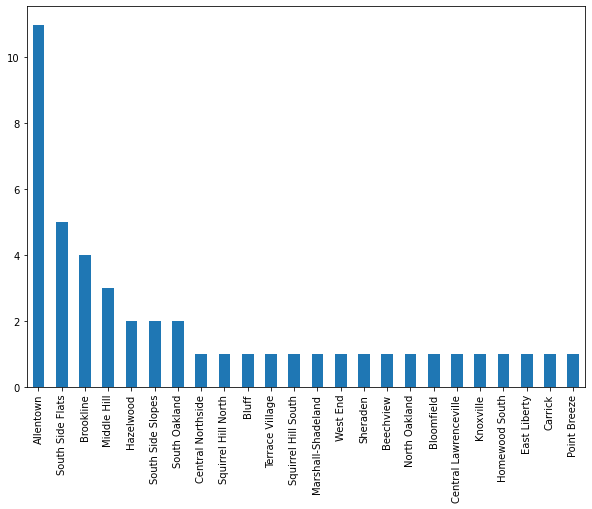

In [6]:
plt.figure(figsize=(10, 7))
publicwifi.neighborhood.value_counts().plot(kind="bar")

Here we can see that Allentown has the most in terms of public wi-fi locations.

However, there are a few other factors to consider when determining the best neighborhood in terms of public wi-fi locations. Such factors include availible times and amenities such as seating and restrooms. Each location will be assigned a weighted score based off of these factors. 24/7 access accounts for 40%, seating and restrooms are 30% each.

In [7]:
scorelist = []
for index, row in publicwifi.iterrows():
    score = 0.0
    locationhour = row['location_hours']
    restroom = row['amenities_restroom']
    seating = row['amenities_seating']
    if locationhour == "24 hours/day, 7 days/week":
        score += 0.4
    if restroom == "yes" or restroom == "Yes":
        score += 0.3
    if seating == "yes" or seating == "Yes":
        score += 0.3
    scorelist.append(score)

publicwifi.insert(1, "score", scorelist)

Now that we have gotten all of our values to determine the best neighborhood, we can remove unnecessary columns from the dataset to help make it easier to look at.

In [8]:
publicwifi = publicwifi[["neighborhood", "score", "location_name", "location_hours", "street1", "zip", "amenities_restroom", "amenities_seating", "id"]]
publicwifi.head(10)

,neighborhood,score,location_name,location_hours,street1,zip,amenities_restroom,amenities_seating,id
0,Central Northside,1.0,Carnegie Library of Pittsburgh - Allegheny,"24 hours/day, 7 days/week",1230 Federal Street,15212.0,yes,yes,CLP_Allegheny
1,Beechview,1.0,Carnegie Library of Pittsburgh - Beechview,"24 hours/day, 7 days/week",1910 Broadway Avenue,15216.0,yes,yes,CLP_Beechview
2,Brookline,1.0,Carnegie Library of Pittsburgh - Brookline,"24 hours/day, 7 days/week",708 Brookline Boulevard,15226.0,yes,yes,CLP_Brookline
3,Carrick,1.0,Carnegie Library of Pittsburgh - Carrick,"24 hours/day, 7 days/week",1811 Brownsville Road,15210.0,yes,yes,CLP_Carrick
4,East Liberty,1.0,Carnegie Library of Pittsburgh - East Liberty,"24 hours/day, 7 days/week",130 S. Whitfield Street,15206.0,yes,yes,CLP_East_Liberty
5,Hazelwood,1.0,Carnegie Library of Pittsburgh - Hazelwood,"24 hours/day, 7 days/week",5006 Second Avenue,15207.0,yes,yes,CLP_Hazelwood
6,Middle Hill,1.0,Carnegie Library of Pittsburgh - Hill District,"24 hours/day, 7 days/week",2177 Centre Avenue,15219.0,yes,yes,CLP_Hill_District
7,Homewood South,1.0,Carnegie Library of Pittsburgh - Homewood,"24 hours/day, 7 days/week",7101 Hamilton,15208.0,yes,yes,CLP_Homewood
8,Knoxville,1.0,Carnegie Library of Pittsburgh - Knoxville,"24 hours/day, 7 days/week",400 Brownsville Road,15210.0,yes,yes,CLP_Knoxville
9,Central Lawrenceville,1.0,Carnegie Library of Pittsburgh - Lawrenceville,"24 hours/day, 7 days/week",279 Fisk Street,15201.0,yes,yes,CLP_Lawrenceville


Finally the last step to determining the best neighborhood is to calculate the total score based on the amount of public wi-fi locations.

In [9]:
neighborhood_dict = dict()

for index, row in publicwifi.iterrows():
    if (row['neighborhood'] in neighborhood_dict):
        neighborhood_dict[row['neighborhood']] = neighborhood_dict[row['neighborhood']] + row['score']
    else:
        neighborhood_dict[row['neighborhood']] = row['score']
        
neighborhood_dict

{'Central Northside': 1.0,
 'Beechview': 1.0,
 'Brookline': 2.1999999999999997,
 'Carrick': 1.0,
 'East Liberty': 1.0,
 'Hazelwood': 1.4,
 'Middle Hill': 2.7,
 'Homewood South': 1.0,
 'Knoxville': 1.0,
 'Central Lawrenceville': 1.0,
 'Bloomfield': 1.0,
 'North Oakland': 1.0,
 'Sheraden': 1.0,
 'South Side Flats': 2.5999999999999996,
 'Squirrel Hill North': 1.0,
 'West End': 1.0,
 'Marshall-Shadeland': 1.0,
 'South Oakland': 0.8,
 'Allentown': 4.6,
 'Squirrel Hill South': 0.4,
 'South Side Slopes': 0.8,
 'Terrace Village': 1.0,
 'Bluff': 0.7,
 'Point Breeze': 0.4}

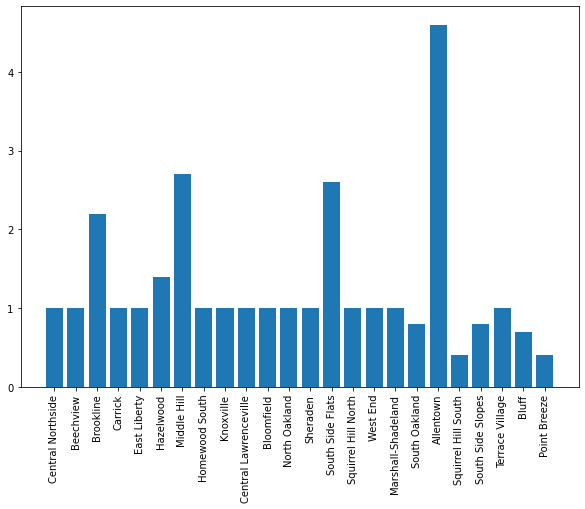

In [10]:
plt.figure(figsize=(10, 7))
plt.bar(neighborhood_dict.keys(), neighborhood_dict.values())
plt.xticks(rotation='vertical')
plt.show()

Allentown here still has the highest score, but some of the other places have shifted a bit when accounting for this scoring. Middle Hill and South Side Flats are the runner ups, then Brookline. 
So if you want a neighborhood with lots of public wi-fi locations, Allentown is the place. As someone who is still relatively unfamiliar with Pittsburgh, I do not have any preference for favorite neighborhoods or anything, but it was interesting to see how public wi-fi locations are distributed accross Pittsburgh.